# IS4303 IT-MEDIATED FINANCIAL SOLUTIONS AND PLATFORMS

> ## Homework 3 - Tree and Ensemble Methods
> ## Due Date: March 22 (Mon.), 2021, 23:00 SG Time
> ## Name your `.ipynb` file as "`StudentID_YourName_HW3.ipynb`" and then upload 
> ## Please keep your results in this notebook

<div class="alert alert-warning">
<b>Python Version:</b> 3.7+<br>Create a virtual environment in Anaconda if needed.
</div>

## Sections
<ul>
    <li><a href="#Sec0" style="text-decoration: none">0. Assignment Overview</a></li>
    <li><a href="#Sec1" style="text-decoration: none">2. Data Preprocessing</a></li>
    <li><a href="#Sec2" style="text-decoration: none">3. Tree and Ensemble Learning</a></li>
</ul>

<a id="Sec0"></a> 
## 0 Assignment Overview

* The goal of this assignment is to understand (1) Decision Tree (2) Ensemble Learning Methods (3) ROC and AUC.
* In this assignment, we will clean data and build linear models using a lending dataset. 
* A dataset containing complete loan data for all loans issued has been uploaded on Luminus. It includes the current loan status (Current, Late, Fully Paid, etc.) and a large set of attributes for each customer. 
* The assignment will require you to use the dataset to build models to predict loan default.
* Please answer the questions and write the code / results in the empty cells.
* 47 pts in total

<a id="1"></a>

## Questions:
* [Question 1](#Q1)
* [Question 2](#Q2)
* [Question 3](#Q3)
* [Question 4](#Q4)
* [Question 5](#Q5)
* [Question 6](#Q6)
* [Question 7](#Q7)
* [Question 8](#Q8)
* [Question 9](#Q9)
* [Question 10](#Q10)
* [Question 11](#Q11)

<a id="Sec1"></a> 
## 1 Data Preprocessing

In [281]:
#!usr/bin/env python
#-*- coding:utf-8 -*-
from __future__ import division, print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt, log
from functools import reduce, partial
from collections import defaultdict
from IPython.display import HTML
%matplotlib inline

<div class="alert alert-warning">
<b>Step 1: Read data into python pandas and named as "loans".</b>
</div>

In [282]:
%pwd
loan1 = pd.read_csv("/Users/chandya/Desktop/IS4303/HW3/LoanStats_securev1_2020Q1.csv", low_memory=False, header=1)
loan2 = pd.read_csv("/Users/chandya/Desktop/IS4303/HW3/LoanStats_securev1_2020Q2.csv", low_memory=False, header=1)
loan3 = pd.read_csv("/Users/chandya/Desktop/IS4303/HW3/LoanStats_securev1_2020Q3.csv", low_memory=False, header=1)

# Append multiple datasets
dataset = [loan1, loan2, loan3]
loans = reduce(lambda left, right: pd.concat([left, right], ignore_index=True), dataset)
loans.head(n=10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,166907367,NaN,3500.0,3500.0,3500.0,36 months,11.71%,115.77,B,B3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,166795268,NaN,5000.0,5000.0,5000.0,36 months,18.62%,182.33,D,D1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,168697246,NaN,32800.0,32800.0,32800.0,36 months,10.81%,1070.89,A,A5,...,590.95,32967.43,0,N,NaN,NaN,NaN,NaN,NaN,NaN
3,168186203,NaN,40000.0,40000.0,40000.0,36 months,12.40%,1336.23,B,B4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,168657451,NaN,10000.0,10000.0,10000.0,36 months,16.12%,352.17,C,C3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
5,168691379,NaN,17900.0,17900.0,17875.0,36 months,24.55%,707.45,D,D2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
6,168695384,NaN,20000.0,20000.0,20000.0,60 months,16.08%,487.22,B,B5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
7,167793619,NaN,8000.0,8000.0,8000.0,36 months,20.55%,299.56,D,D2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
8,168693446,NaN,25000.0,25000.0,25000.0,60 months,15.40%,600.02,B,B4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
9,168274157,NaN,40000.0,40000.0,40000.0,36 months,11.71%,1323.04,B,B3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [283]:
loans.shape

(146720, 150)

<div class="alert alert-warning">
<b>Step 2: Delete rows when <code><b><i>loan_status</i></b></code> is "Current".</b> 
</div>

In [284]:
loans = loans[loans['loan_status'] != 'Current']

<div class="alert alert-warning">
<b>Step 3: Create a new variable <code><b><i>bad_loans</i></b></code>: 1 means a risky (bad) loan, and 0 means a safe loan. A loan is risky when loan status is "Charged Off", "Late (16-30 days)", or "Late (31-120 days)", and the loan is safe when otherwise.</b>
</div>

In [285]:
bad_status = ['Late (31-120 days)', 'Late (16-30 days)', 'Charged Off']
loans['bad_loans'] = loans['loan_status'].map(lambda x: 1 if x in bad_status else 0)

<div class="alert alert-warning">
<b>Step 4: Use a subset of numerical features.</b>
<div class="alert alert-danger">
<b>Note:</b><p>Definitions of all columns are provided in a seperate file <b>LCDataDictionary.xlsx</b>.</p>
</div>
</div>

In [286]:
from copy import deepcopy
loans_new = deepcopy(loans) # Please note the difference between shallow copy and deep copy in Python

# We select 70 numerical features
feature_full_list = ['acc_now_delinq','acc_open_past_24mths','all_util','annual_inc','avg_cur_bal','bc_open_to_buy','bc_util',
                     'chargeoff_within_12_mths','collections_12_mths_ex_med','delinq_amnt','dti','inq_fi','inq_last_12m','inq_last_6mths',
                     'installment','int_rate','last_pymnt_amnt','loan_amnt','max_bal_bc','mo_sin_old_il_acct','mo_sin_old_rev_tl_op',
                     'mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_last_delinq','mths_since_rcnt_il',
                     'num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl',
                     'num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m',
                     'open_acc','open_acc_6m','open_act_il','open_il_12m','open_il_24m','open_rv_12m','open_rv_24m','out_prncp',
                     'out_prncp_inv','pct_tl_nvr_dlq','percent_bc_gt_75','pub_rec_bankruptcies','revol_bal','revol_util','tax_liens',
                     'tot_coll_amt','tot_cur_bal','tot_hi_cred_lim','total_acc','total_bal_ex_mort','total_bal_il','total_bc_limit',
                     'total_cu_tl','total_il_high_credit_limit','total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee',
                     'total_rec_prncp','total_rev_hi_lim','delinq_2yrs']
output = 'bad_loans'
loans_new = loans_new[feature_full_list+[output]]
loans_new.dtypes

acc_now_delinq          float64
acc_open_past_24mths    float64
all_util                float64
annual_inc              float64
avg_cur_bal             float64
                         ...   
total_rec_late_fee      float64
total_rec_prncp         float64
total_rev_hi_lim        float64
delinq_2yrs             float64
bad_loans                 int64
Length: 71, dtype: object

<div class="alert alert-warning">
<b>Step 5: Transform non-numerical features to numerical.</b>
</div>

In [287]:
# Transform object type to numerical type
loans_new['int_rate'] = loans_new['int_rate'].str.rstrip('%').astype('float')
loans_new['revol_util'] = loans_new['revol_util'].str.rstrip('%').astype('float')

<div class="alert alert-warning">
<b>Step 6: Drop Missing Values.</b>
</div>

In [288]:
# Remove missing values and summary statistics
loans_new.dropna(inplace=True)
print(loans_new.shape)
loans_new.describe()

(7044, 71)


,acc_now_delinq,acc_open_past_24mths,all_util,annual_inc,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_amnt,...,total_cu_tl,total_il_high_credit_limit,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,delinq_2yrs,bad_loans
count,7044.000000,7044.000000,7044.000000,7.044000e+03,7044.000000,7044.000000,7044.000000,7044.000000,7044.000000,7044.00000,...,7044.000000,7044.000000,7044.000000,7044.000000,7044.000000,7044.000000,7044.000000,7044.000000,7044.000000,7044.000000
mean,0.001420,5.468626,55.223595,9.636740e+04,16272.102783,16325.871238,46.229089,0.017320,0.024702,8.48410,...,2.033220,58155.624645,12264.187106,12262.713477,854.890899,0.081830,11387.047892,39969.021721,0.513203,0.163118
std,0.037654,3.594687,20.930766,7.196207e+04,18276.967612,20832.045129,28.954573,0.165919,0.168388,521.49116,...,3.313482,56131.045225,10625.884346,10625.118448,885.928334,1.761294,10323.957830,36829.394759,1.036312,0.369499
min,0.000000,0.000000,0.000000,1.892000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.000000
25%,0.000000,3.000000,41.000000,5.700000e+04,3773.000000,3482.000000,22.300000,0.000000,0.000000,0.00000,...,0.000000,22772.500000,3604.067500,3604.067500,218.112500,0.000000,2673.062500,17300.000000,0.000000,0.000000
50%,0.000000,5.000000,56.000000,8.000000e+04,10037.500000,9401.500000,43.700000,0.000000,0.000000,0.00000,...,1.000000,44022.000000,9294.993272,9294.995000,563.650000,0.000000,8800.000000,30100.000000,0.000000,0.000000
75%,0.000000,7.000000,70.000000,1.150000e+05,23079.750000,21669.000000,69.800000,0.000000,0.000000,0.00000,...,3.000000,76464.500000,17856.157500,17848.557500,1215.445000,0.000000,17000.000000,50700.000000,1.000000,0.000000
max,1.000000,26.000000,158.000000,1.800000e+06,254106.000000,340337.000000,156.300000,6.000000,3.000000,41845.00000,...,47.000000,855677.000000,45196.590000,45196.590000,7661.780000,59.020000,40000.000000,411700.000000,17.000000,1.000000


In [289]:
# Save a copy 
from copy import deepcopy
data = deepcopy(loans_new)

<a id="Sec2"></a> 
## 2 Tree and Ensemble Learning

In [290]:
# Import libraries
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc,roc_auc_score

# Read data
data.head(n=10)

,acc_now_delinq,acc_open_past_24mths,all_util,annual_inc,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_amnt,...,total_cu_tl,total_il_high_credit_limit,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,delinq_2yrs,bad_loans
7,0.0,6.0,49.0,90000.0,5955.0,4554.0,45.1,0.0,0.0,0.0,...,12.0,6885.0,8659.45,8659.45,659.45,0.0,8000.00,53500.0,0.0,0
32,0.0,2.0,57.0,61000.0,6257.0,11454.0,18.2,0.0,0.0,0.0,...,2.0,46276.0,13450.60,13450.60,450.60,0.0,13000.00,19500.0,0.0,0
52,0.0,19.0,39.0,134000.0,5124.0,127013.0,4.9,0.0,0.0,0.0,...,3.0,140133.0,12123.36,12123.36,123.36,0.0,12000.00,156500.0,1.0,0
64,0.0,3.0,100.0,115000.0,9426.0,13353.0,37.9,0.0,0.0,0.0,...,1.0,150996.0,8976.96,8976.96,476.96,0.0,8500.00,27500.0,1.0,0
66,0.0,9.0,67.0,77000.0,10869.0,15086.0,19.8,0.0,0.0,0.0,...,3.0,101623.0,27852.38,27852.38,2327.38,0.0,25525.00,22700.0,0.0,0
136,0.0,2.0,35.0,20000.0,2029.0,23768.0,29.5,0.0,0.0,0.0,...,0.0,6500.0,12842.14,12842.14,842.14,0.0,12000.00,34700.0,1.0,0
213,0.0,4.0,66.0,114000.0,35626.0,184.0,96.5,0.0,0.0,0.0,...,4.0,28794.0,3019.19,3019.19,1130.16,0.0,1889.03,8800.0,0.0,1
219,0.0,3.0,73.0,150000.0,4813.0,1239.0,94.9,0.0,0.0,0.0,...,5.0,33211.0,22358.00,22358.00,358.00,0.0,22000.00,26200.0,0.0,0
303,0.0,3.0,18.0,130000.0,534.0,13521.0,13.3,0.0,0.0,0.0,...,0.0,8000.0,8441.64,8441.64,41.64,0.0,8400.00,16400.0,0.0,0
323,0.0,12.0,40.0,62000.0,6016.0,15729.0,12.6,0.0,0.0,0.0,...,0.0,31131.0,3051.53,3051.53,51.53,0.0,3000.00,34600.0,0.0,0


<div class="alert alert-warning">
<b>Step 7: Train-Test Split</b>
</div>

In [291]:
# Split the dataset
output = 'bad_loans'
X = data.drop(output, axis=1) # Here no need to set inplace=True
y = data[output]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(y_train.sum()/y_train.count(),y_test.sum()/y_test.count())

0.16713995943204868 0.15373699148533584


<a id="Q1"></a>
<div class="alert alert-info">
<b>Question 1 (2 pts): Decision Tree For Classification</b> 
<p>Please fit training data with <b>Classification Tree</b> model.</p>
<p>Please report/print test accuracy on the <code><b>test</b></code> dataset.</p>
<p><b>Remember: </b>Set <code><b>random_state=42</b></code> so that results can be replicated.</p> 
<p>You can refer to: </p>
<div class="btn-group">    
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html" target="_blank" class="btn btn-primary" role="button" style="text-decoration: none">Classification Tree</a>
</div>
</div>

In [292]:
# Fit a decision tree model on the train set
DTC = DecisionTreeClassifier(random_state=42)
DTC = DTC.fit(X_train,y_train)

In [293]:
# Get predicted labels for the test set
y_pred_dtc = DTC.predict(X_test)

# Performance of model on the test set
print("Accuracy:",accuracy_score(y_test, y_pred_dtc))

Accuracy: 0.9337748344370861


<a id="Q2"></a>
<div class="alert alert-info">
<b>Question 2 (4 pts): Ensemble Methods For Classification</b> 
<p>Please fit training data with <b>Bagging model</b>, <b>Random Forest model</b>, <b>AdaBoosting model</b> and <b>Gradient Boosting model</b>.</p>
<p>Please report/print test accuracy scores of these 4 models on the <code><b>test</b></code> dataset.</p>
<p><b>Remember: </b>Set <code><b>n_estimators=50</b></code> and <code><b>random_state=42</b></code> so that results can be replicated.</p> 
<p>You can refer to: </p>
<div class="btn-group">    
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html" target="_blank" class="btn btn-primary" role="button" style="text-decoration: none">Bagging</a>
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html" target="_blank" class="btn btn-success" role="button" style="text-decoration: none">Random Forest</a>
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html" target="_blank" class="btn btn-warning" role="button" style="text-decoration: none">AdaBoost</a>
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html" target="_blank" class="btn btn-danger" role="button" style="text-decoration: none">Gradient Boost</a>
</div>
</div>

In [294]:
# Number of base learners
N = 50

* Bagging Model

In [295]:
# train a Bagging model
BGM = BaggingClassifier(n_estimators=N,random_state=42)
BGM = BGM.fit(X_train, y_train)

In [296]:
# Get predicted labels for the test set
y_pred_bgm = BGM.predict(X_test)

# Performance of the model on the test set
print("Accuracy:" , accuracy_score(y_test, y_pred_bgm))

Accuracy: 0.934247871333964


* Random Forest Model

In [297]:
# train a Random Forest model
RFM = RandomForestClassifier(n_estimators=N,random_state=42)
RFM = RFM.fit(X_train, y_train)

In [298]:
# Get predicted labels for the test set
y_pred_rfm = RFM.predict(X_test)

# Performance of the model on the test set
print("Accuracy:" , accuracy_score(y_test, y_pred_rfm))

Accuracy: 0.9314096499526963


* AdaBoost Model

In [299]:
# train a AdaBoost model
ABC = AdaBoostClassifier(n_estimators=N,random_state=42)
ABC = ABC.fit(X_train, y_train)

In [300]:
# Get predicted labels for the test set
y_pred_abc = ABC.predict(X_test)

# Performance of the model on the test set
print("Accuracy:" , accuracy_score(y_test, y_pred_abc))

Accuracy: 0.934720908230842


* Gradient Boosting Model

In [301]:
# train a Gradient Boosting model
GBC = GradientBoostingClassifier(n_estimators=N,random_state=42)
GBC = GBC.fit(X_train, y_train)

In [302]:
# Get predicted labels for the test set
y_pred_gbc = GBC.predict(X_test)

# Performance of the model on the test set
print("Accuracy:" , accuracy_score(y_test, y_pred_gbc))


Accuracy: 0.9370860927152318


<a id="Q3"></a>
<div class="alert alert-info">
<b>Question 3 (6 pts): Confusion Matrix, ROC and AUC</b> 
<p>Please print/report confusion matrix (i.e., true/false positive/negative) of the tree model in Question 1, and the 4 ensemble models in Question 2, on test data.</p>
<p>Please plot ROC curves and report/print AUC values of the tree model in Question 1, and the 4 ensemble models in Question 2, on test data (You can plot them in one figure).</p>
<p><b>Remember: </b>Set <code><b>n_estimators=50</b></code> and <code><b>random_state=42</b></code> so that results can be replicated.</p> 
<p>You can refer to: </p>
<div class="btn-group"> 
    <a href="https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics" target="_blank" class="btn btn-success" role="button" style="text-decoration: none">Performance Metrics</a>
    <a href="https://matplotlib.org/users/pyplot_tutorial.html" target="_blank" class="btn btn-warning" role="button" style="text-decoration: none">Matplotlib</a>
</div>
</div>

In [303]:
# Models: tree, Bag, RF, Ada, GB
#DTC, BGM, RFM, ABC, GBC


In [304]:
'''
Confusion Matrix:
[tn, fp]
[fn, tp]
'''
# tree
cm_dtc = confusion_matrix(y_test,y_pred_dtc)
tn_dtc, fp_dtc, fn_dtc, tp_dtc = cm_dtc.ravel()
#visualisation
print("Confusion Matrix for Decision Tree Model Method")
print(["TN=",tn_dtc, "FP=",fp_dtc])
print(["FN=",fn_dtc, "TP=",tp_dtc])


#bag
cm_bgm = confusion_matrix(y_test,y_pred_bgm)
tn_bgm, fp_bgm, fn_bgm, tp_bgm = cm_bgm.ravel()
#visualisation
print("Confusion Matrix for Bagging Method")
print(["TN=",tn_bgm, "FP=",fp_bgm])
print(["FN=",fn_bgm, "TP=",tp_bgm])

#RF
cm_rfm = confusion_matrix(y_test,y_pred_rfm)
tn_rfm, fp_rfm, fn_rfm, tp_rfm = cm_rfm.ravel()
#visualisation
print("Confusion Matrix for Random Forest Method")
print(["TN=",tn_rfm, "FP=",fp_rfm])
print(["FN=",fn_rfm, "TP=",tp_rfm])

#ABC
cm_abc = confusion_matrix(y_test,y_pred_abc)
tn_abc, fp_abc, fn_abc, tp_abc = cm_abc.ravel()
#visualisation
print("Confusion Matrix for Adaboosting Method")
print(["TN=",tn_abc, "FP=",fp_abc])
print(["FN=",fn_abc, "TP=",tp_abc])

#GBC
cm_gbc = confusion_matrix(y_test,y_pred_gbc)
tn_gbc, fp_gbc, fn_gbc, tp_gbc = cm_gbc.ravel()
#visualisation
print("Confusion Matrix for Gradient Boosting Method")
print(["TN=",tn_gbc, "FP=",fp_gbc])
print(["FN=",fn_gbc, "TP=",tp_gbc])

Confusion Matrix for Decision Tree Model Method
['TN=', 1714, 'FP=', 75]
['FN=', 65, 'TP=', 260]
Confusion Matrix for Bagging Method
['TN=', 1732, 'FP=', 57]
['FN=', 82, 'TP=', 243]
Confusion Matrix for Random Forest Method
['TN=', 1705, 'FP=', 84]
['FN=', 61, 'TP=', 264]
Confusion Matrix for Adaboosting Method
['TN=', 1719, 'FP=', 70]
['FN=', 68, 'TP=', 257]
Confusion Matrix for Gradient Boosting Method
['TN=', 1710, 'FP=', 79]
['FN=', 54, 'TP=', 271]


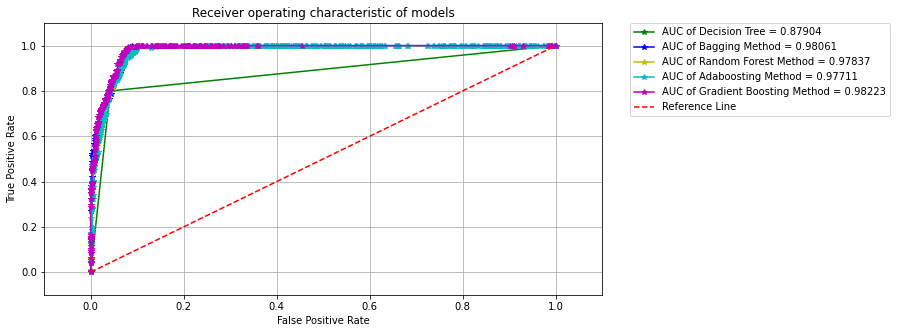

In [305]:
# ROC and AUC of test data
# Please plot ROC curves and report/print AUC values of the tree model in Question 1, 
# and the 4 ensemble models in Question 2, on test data (You can plot them in one figure).

# Predictions
#dtc
scores1 = DTC.predict_proba(X_test)[:, 1]
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test, scores1)
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)

#bgm
scores2 = BGM.predict_proba(X_test)[:, 1]
fpr_bgm, tpr_bgm, thresholds_bgm = roc_curve(y_test, scores2)
roc_auc_bgm = auc(fpr_bgm, tpr_bgm)

#rfm
scores3 = RFM.predict_proba(X_test)[:, 1]
fpr_rfm, tpr_rfm, thresholds_rfm = roc_curve(y_test, scores3)
roc_auc_rfm = auc(fpr_rfm, tpr_rfm)

#abc
scores4 = ABC.predict_proba(X_test)[:, 1]
fpr_abc, tpr_abc, thresholds_abc = roc_curve(y_test, scores4)
roc_auc_abc = auc(fpr_abc, tpr_abc)

#gbc
scores5 = GBC.predict_proba(X_test)[:, 1]
fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(y_test, scores5)
roc_auc_gbc = auc(fpr_gbc, tpr_gbc)


# Graph
plt.figure(figsize=(10,5))
plt.grid(True)

#put the models in here
plt.plot(fpr_dtc, tpr_dtc, 'g*-', label='AUC of Decision Tree = %0.5f' % roc_auc_dtc)
plt.plot(fpr_bgm, tpr_bgm, 'b*-', label='AUC of Bagging Method = %0.5f' % roc_auc_bgm)
plt.plot(fpr_rfm, tpr_rfm, 'y*-', label='AUC of Random Forest Method = %0.5f' % roc_auc_rfm)
plt.plot(fpr_abc, tpr_abc, 'c*-', label='AUC of Adaboosting Method = %0.5f' % roc_auc_abc)
plt.plot(fpr_gbc, tpr_gbc, 'm*-', label='AUC of Gradient Boosting Method = %0.5f' % roc_auc_gbc)

plt.plot([0,1], [0,1], 'r--', label='Reference Line')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.title('Receiver operating characteristic of models')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



<a id="Q4"></a>
<div class="alert alert-info">
<b>Question 4 (5 pts):  </b> 
<p>One often argue that generally speaking, decision tree-based bagging has worse predictive performance and is slower in running time than random forest. Do you agree with this view? Explain your reason. </p>
</div>

<div class="alert alert-danger">
<b>Note:</b><p>For the short answer questions in this homework, you just need to concisely but precisely answer them according to what you have learn from the lecture and tutorial or other materials. Lengthy answer is not necessary. 10 points on one question does not means there are 10 key points in the answer. Try to provide what you think it is necessary and related.</p>
</div>

In [306]:
# Write your answer here

# Yes, random forest selection has a better predicitive performance than decision tree-based bagging.
# This is because in regular bagging we provide each tree with the full set of features wherein in random forest we 
# draw random subsets of features from original train set for training of individual tress.
# Due to random feature selection, the trees are more independent of each other compared to regular bagging, 
# which often results in better predictive performance due to better variance-bias trade-offs. 
# The performance is also faster than bagging, because each tree learns only from a subset of features
 


<a id="Q5"></a>
<div class="alert alert-info">
<b>Question 5 (3 pts): Bagging Method</b> 
<p>Assume you have a simple model $M$ for classification problem and you find the predictive performance is not good on neither train set nor test set. Through this module, you have known that ensemble methods may help with this problem. Now you consider to use bagging way on the same simple model $M$. Do you think you can significantly improve the performance？</p>
</div>

In [307]:
# Write your answer here
# How can a ensemble method (bootstrapping aggregation) like bagging improve a simple base model. Answer is yes.

# No bagging will not improve performance of a simple model M with high bias. Bagging is an effective way to improve 
# variance by averaging from multiple different models on variants of training sets which helps to see different parts 
# of the problem and decrease the variance of the model. If the model is trained initially with high bias, bagging will
# not improve the scenario. Because if initial model is weak in fitting data points well it will not fit test data well 
# no matter how much it is aggregated as aggregation only improves variance.



<a id="Q6"></a>
<div class="alert alert-info">
<b>Question 6 (3 pts)</b> 
<p>If we learn an AdaBoost model with some decision trees. We want to train every individual tree to be perfect. Do you think it will be a good AdaBoost model?</p>
</div>

In [308]:
# Write your answer here
# No. Adaboosting, simply put, is a way to build a strong learner (predictive model) from the mistakes of several 
# weaker models. Since it’s a sequential learning model, subsequence models learn from the mistakes by reducing the 
# errors from previous models. This way boosting reduces bias error which arises when models are not able to accurately 
# identify relevant trends in the data. Therefore, its vital that the decision trees are not perfect and be maintained 
# as weak classifiers (a classifier model that performs better than random guessing but still poorly at designating 
# classes to objects) so that Adaboosting model can assign a weight to the training instances in accordance to the 
# misclassification rate and adjust the next model in accordance until the training data is predicted perfectly/maximum 
# number of models have been added. Combining stable learners will not improve generalization performance.


<a id="Q7"></a>
<div class="alert alert-info">
<b>Question 7 (6 pts): Boosting Method</b> 
<p>7.1 We have known that Boosting is one kind of sequential learning method, which means the individual models sequentially learn from data and output of last individual model. Assume you have fitted one boosting model. Do you have to also sequentially make prediction on those individual models? Or do the prediction-making of every individual model can be parallel?</p>
<p>7.2 Let assume a fitted Adaboost model has a sequence of individual models $M_1, M_2, M_3,...,M_n$. Are those individual models learn from one same distribution of data of input? </p>
</div>

In [309]:
# Write your answer here
# 7.1 
'''In Boosting, in each step of the sequence, the model tries to learn small amounts of information about target from 
each weak learner, trying to improve upon previous models and then sum them to get final predictions. This would mean 
that we are fitting to residuals of the previous models. Therefore, for example, each sequential learner model will 
try to predict (initial predictions) — (λ * sum_of_all_predictions_of_previous_learners) where λ is different based 
on each model’s performance. Therefore, prediction is sequential as it will depend on predictions of previous learners.
'''   

# 7.2 
'''No, if the data inputted into model m1 is x, the data inputted into m2 would be a different distribution of data 
wherein more weight is assigned to incorrectly classified sample points based on the misclassification rate of the 
previous model. Therefore, the distribution of data of input will be different in each individual model as it learns 
from the previous model and assigns a new weight distribution to the data inputted into the subsequent model each 
round until the training data is predicted perfectly/maximum number of models have been added. 
'''


'No, if the data inputted into model m1 is x, the data inputted into m2 would be a different distribution of data \nwherein more weight is assigned to incorrectly classified sample points based on the misclassification rate of the \nprevious model. Therefore, the distribution of data of input will be different in each individual model as it learns \nfrom the previous model and assigns a new weight distribution to the data inputted into the subsequent model each \nround until the training data is predicted perfectly/maximum number of models have been added. \n'

<a id="Q8"></a>
<div class="alert alert-info">
<b>Question 8 (4 pts): Ensemble Methods and Model Performance</b> 
<p>Based on your results in Question 3, do you think that ensemble learning methods can improve model performance? If yes, why do you think so? What are the advantages of these ensemble methods.</p>
</div>

In [310]:
# Write your answer here
# Open question

# From the graph generated in question 3, it is evident ensemble methods improve the performance of decision tree 
# classification. The AUC of decision tree classification without ensemble methods, as indicated by the green line, is 
# about 10% lower than the Area under Curve (AUC) of the receiver operating characteristic (ROC) curves of decision-tree 
# based bagging, random forest, adaboosting and gradient boosting.

# Ensemble learning methods can improve the model performance by combining several models to allow the production of 
# better predictive performance compared to a single model. 

# Bagging averages together multiple estimates by training M different trees on different subsets of the data 
# (chosen randomly with replacement) and obtains an ensemble.  It then aggregates the outputs of base learners, 
# using voting by classification and averaging for regression. This will reduce the variance while retaining the bias.

# Random forests method  generates trees built from a sample drawn with replacement from the training set, but instead 
# of using all features, a subset of features are selected (if there are p features, the square root of p number of 
# features is chosen in each tree). When these less correlated trees are averaged, the variance decreases and increases 
# performance of model.

# Boosting is a sequential learner which fits a sequence of weak learners (defined as models that are only slightly 
# better than random guessing) and converts them to strong learner. It takes a training data and generates a different 
# distribution of data in each iteration until the model is perfect or the maximum number of rounds specified is reached. After many iterations, the boosting algorithm combines the weak models into a single strong prediction model. The distribution of data in each iteration is generated in accordance to its prediction error, by assigning a weight (Adaboosting) or using the residual to minimize loss function in each subsequent individual model (Gradient Tree Boosting). This reduces the difference between actual output and predicted output hence decreasing the bias. 

# When these two types of models that reduces variance and bias are combined using stacking, the overall performance is 
# increased.

# Therefore the advantages are, ensemble methods increase model prediction performance by decreasing variance 
# (bagging, random forest),  decreasing bias (boosting) and improving predictions (stacking).


<a id="Q9"></a>
<div class="alert alert-info">
<b>Question 9 (6 pts): Model Complexity and Performance</b> 
<p>Will model performance be improved or not, if we increase the number of base learners of these 4 ensemble models?</p>
<p>Please also use visualization tools (e.g., plot/chart/diagram) to support your arguments.</p>
<p><b>Remember: </b>Set <code><b>random_state=42</b></code> so that results can be replicated.</p> 
</div>

In [311]:
def accuracy_method(y_pred):
    return accuracy_score(y_test, y_pred)

def error_rate(y_pred):
    cm = confusion_matrix(y_test,y_pred)
    tn, fp, fn, tp = cm.ravel()
    return ((fp+fn)/(tn + fp + fn + tp))
        
def sensitivity(y_pred):
    cm = confusion_matrix(y_test,y_pred)
    tn, fp, fn, tp = cm.ravel()
    return tp / (tp + fn)
        
def precision(y_pred):
    return (precision_score(y_test, y_pred))
        
def auc_value(model):
    scores = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, scores) # fpr: FP Rate, tpr: TP Rate, thresholds: Pr(y=1)
    roc_auc = auc(fpr, tpr)

    return roc_auc

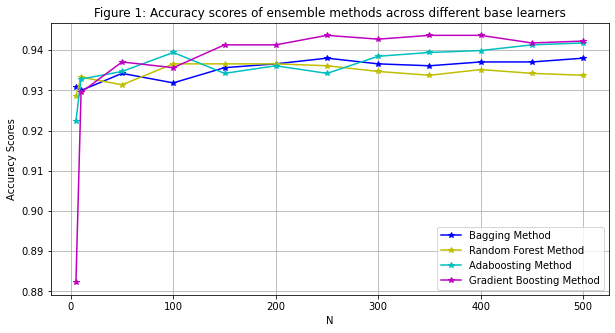

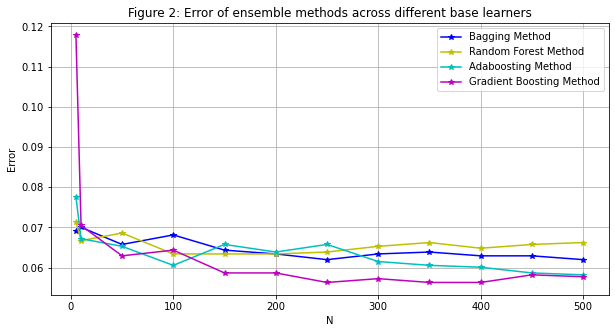

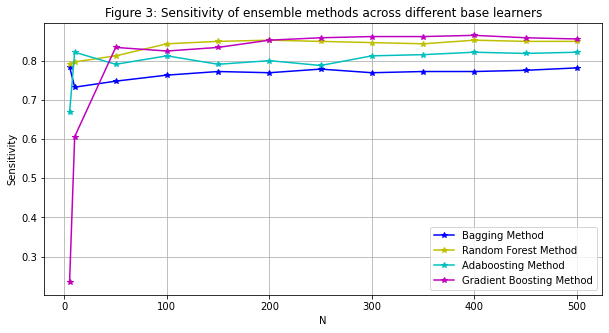

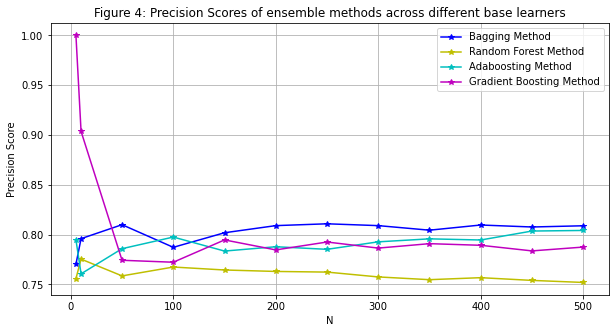

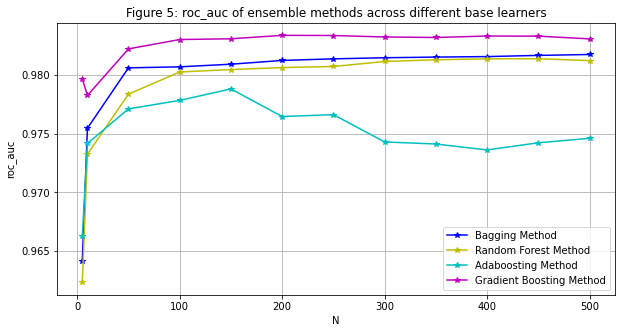

In [312]:
# Number of base learners
N_base = [5, 10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Performance Metrics
metrics = ['accuracy','error', 'sensitivity', 'precision', 'roc_auc']

accuracy_bgm = []
accuracy_rfm = []
accuracy_abc = []
accuracy_gbc = []

error_bgm = []
error_rfm = []
error_abc = []
error_gbc = []

sn_bgm = []
sn_rfm = []
sn_abc = []
sn_gbc = []

pr_bgm = []
pr_rfm = []
pr_abc = []
pr_gbc = []

auc_bgm = []
auc_rfm = []
auc_abc = []
auc_gbc = []


for N in N_base:
    
    # print("code is processing:", N)
            
    BGM = BaggingClassifier(n_estimators=N,random_state=42)
    BGM = BGM.fit(X_train, y_train)
    y_pred_bgm = BGM.predict(X_test)
    accuracy_bgm.append(accuracy_method(y_pred_bgm))
    error_bgm.append(error_rate(y_pred_bgm))
    sn_bgm.append(sensitivity(y_pred_bgm))        
    pr_bgm.append(precision(y_pred_bgm))
    auc_bgm.append(auc_value(BGM))
    
    RFM = RandomForestClassifier(n_estimators=N,random_state=42)
    RFM = RFM.fit(X_train, y_train)
    y_pred_rfm = RFM.predict(X_test)
    accuracy_rfm.append(accuracy_method(y_pred_rfm))
    error_rfm.append(error_rate(y_pred_rfm))
    sn_rfm.append(sensitivity(y_pred_rfm))        
    pr_rfm.append(precision(y_pred_rfm))
    auc_rfm.append(auc_value(RFM))
    
    ABC = AdaBoostClassifier(n_estimators=N,random_state=42)
    ABC = ABC.fit(X_train, y_train)
    y_pred_abc = ABC.predict(X_test)
    accuracy_abc.append(accuracy_method(y_pred_abc))
    error_abc.append(error_rate(y_pred_abc))
    sn_abc.append(sensitivity(y_pred_abc))        
    pr_abc.append(precision(y_pred_abc))
    auc_abc.append(auc_value(ABC))
    
    GBC = GradientBoostingClassifier(n_estimators=N,random_state=42)
    GBC = GBC.fit(X_train, y_train)
    y_pred_gbc = GBC.predict(X_test)
    accuracy_gbc.append(accuracy_method(y_pred_gbc))
    error_gbc.append(error_rate(y_pred_gbc))
    sn_gbc.append(sensitivity(y_pred_gbc))        
    pr_gbc.append(precision(y_pred_gbc))
    auc_gbc.append(auc_value(GBC))
    

# Accuracy
plt.figure(num=1, figsize=(10,5))
plt.grid(True)

#put the models in here
plt.plot(N_base, accuracy_bgm, 'b*-', label='Bagging Method')
plt.plot(N_base, accuracy_rfm, 'y*-', label='Random Forest Method')
plt.plot(N_base, accuracy_abc, 'c*-', label='Adaboosting Method')
plt.plot(N_base, accuracy_gbc, 'm*-', label='Gradient Boosting Method')

plt.title('Figure 1: Accuracy scores of ensemble methods across different base learners')
plt.ylabel('Accuracy Scores')
plt.xlabel('N')
plt.legend()
plt.show()


# Error
plt.figure(num=2, figsize=(10,5))
plt.grid(True)

#put the models in here
plt.plot(N_base, error_bgm, 'b*-', label='Bagging Method')
plt.plot(N_base, error_rfm, 'y*-', label='Random Forest Method')
plt.plot(N_base, error_abc, 'c*-', label='Adaboosting Method')
plt.plot(N_base, error_gbc, 'm*-', label='Gradient Boosting Method')

plt.title('Figure 2: Error of ensemble methods across different base learners')
plt.ylabel('Error')
plt.xlabel('N')
plt.legend()
plt.show()

# Sensitivity
plt.figure(num=3, figsize=(10,5))
plt.grid(True)

#put the models in here
plt.plot(N_base, sn_bgm, 'b*-', label='Bagging Method')
plt.plot(N_base, sn_rfm, 'y*-', label='Random Forest Method')
plt.plot(N_base, sn_abc, 'c*-', label='Adaboosting Method')
plt.plot(N_base, sn_gbc, 'm*-', label='Gradient Boosting Method')

plt.title('Figure 3: Sensitivity of ensemble methods across different base learners')
plt.ylabel('Sensitivity')
plt.xlabel('N')
plt.legend()
plt.show()

# Precision
plt.figure(num=4, figsize=(10,5))
plt.grid(True)

#put the models in here
plt.plot(N_base, pr_bgm, 'b*-', label='Bagging Method')
plt.plot(N_base, pr_rfm, 'y*-', label='Random Forest Method')
plt.plot(N_base, pr_abc, 'c*-', label='Adaboosting Method')
plt.plot(N_base, pr_gbc, 'm*-', label='Gradient Boosting Method')

plt.title('Figure 4: Precision Scores of ensemble methods across different base learners')
plt.ylabel('Precision Score')
plt.xlabel('N')
plt.legend()
plt.show()

# AUC
plt.figure(num=5, figsize=(10,5))
plt.grid(True)

#put the models in here
plt.plot(N_base, auc_bgm, 'b*-', label='Bagging Method')
plt.plot(N_base, auc_rfm, 'y*-', label='Random Forest Method')
plt.plot(N_base, auc_abc, 'c*-', label='Adaboosting Method')
plt.plot(N_base, auc_gbc, 'm*-', label='Gradient Boosting Method')

plt.title('Figure 5: roc_auc of ensemble methods across different base learners')
plt.ylabel('roc_auc')
plt.xlabel('N')
plt.legend()
plt.show()


In [313]:
# Analysis:

# On an overall sensitivity rate in an overall increases with the number of base learners across all ensemble methods.

# Performance is generally better with increasing N in Bagging method as accuracy and precision score generally 
# increases with the number of base learners and error rate drops. Despite this general trend, the rates at N=50 is the 
# best with a high precision score, low error rate, high AUC value and relatively higher level of accuracy. 
# Therefore this would be the ideal number of base learners.

# For random forest method as the number of base learners increase, precision score drops and error rate is dropping. 
# Accuracy rate increases up by 1.06% till N=200 and drops. AUC value increases exponentially by approximately 2% from 
# N=0 to 100 and increases by a smaller percentage of 0.1% from N = 100 to 500. Despite the increase in accuracy and 
# # AUC, there are also drops in precision score from N=100 by 0.79%. Therefore random forest method is best for increase 
# in number of base learners from N = 0 to 100.

# Performance of Adaboosting method is increasing as the AUC value drops by 0.4%, the accuracy rate increases by approx 
# 2%, error rate drops and precision rate increases by approx 7.4%.

# There is exponential increase in accuracy for gradient boosting method from N=0 to 100 by around 6.3%, the error rate 
# is dropping, precision score drops by approximately 3.2% and AUC value increases by 0.5%. However AUC value drops 
# thereafter from N=150 to 500 by 0.3%. But the consistent increase in precision score, sensitivity and accuracy and drop
# in error rate compensates for it. Therefore performance is boosted as N increases but only especially so for N = 0
# to 100 and the performance is better than any other ensemble method as the pink line consistently performs better than
# the other lines in the 5 graphs except for precision score in which Bagging overtakes gradient boosting.

# In conclusion, generally having an increase in number of base learners, increases model performance but not by much 
# and it may be more time effective (reduce running time) to choose a smaller number of base learners with just as good 
# performance as a bigger number say around N = 50 to 100 in this case.



<a id="Q10"></a>
<div class="alert alert-info">
<b>Question 10 (3 pts): Limitations of Ensemble Methods</b> 
<p>Based on your knowledge, what are limitations/weakness/disadvantages of these ensemble methods (e.g., bagging, randomforest, gradientboost)? What may influence predictive power of these models?</p>
</div>

In [314]:
# Write your answer here
# Open question:
'''
1) Bagging ensemble methods are dependent on the base learners’ accuracy, therefore if the base learner is already 
highly biased, bagging will not improve the model’s prediction power. 
2) Bagging uses highly correlated training datasets therefore the pattern of the data may not be accurately captured. 
It can also as a result yield high variance estimator and hence overfit training data.
3) Boosting models can suffer from overfitting. Since samples that are incorrectly predicted in one iteration will 
have higher weight in the next one, the isolated and mislabelled points tend to strongly force the classifier to 
create complicated hypothesis to fit them hence causing overfitting. 
4) Lack of interpretability: Harder to inspect these models and check for reasonability to affirm its prediction and 
carry it out (Example: If model says person A will default his loan in the future, it is hard to explain using the 
model why it predicts as so due to its complexity, although such explanation is important for legal purposes)
5) Computationally expensive.
Influences of the model on predictive power:
- Size of K: Cross-validation to determine how many boosting steps to take can reduce overfitting and increase 
predictive performance of the model.
- Number of estimators in bagging and random forest method: This parameter in ensemble method indicates the number of 
base estimators to be created. The number should be carefully tined as a large number would take a very long running 
time while a small number won’t provide accurate predictions.
- Accuracy of base learner in bagging and random forest method: If the base learner is highly biased, predictive 
power of ensemble method will be low.
- Maximum number of features allowed for the split in each decision tree (Random forest):  Higher number of 
maximum features improves performance but if it is too high it can reduce the randomness of the trees. 
- Minimum number of samples required in a node to be considered for splitting (Gradient Boosting): Higher value 
prevents model from learning relations which might be highly specific to the particular sample selected for a tree, 
but too low of a number can result in overfitting.
- Maximum depth of tree: Used to control over-fitting as higher depth will allow the model to learn relations very 
specific to the training dataset.
- Weakness of base learner in boosting. If it is stable, predictive power of boosting will not be good. Around 60% 
accuracy is often preferred.
'''

'\n1) Bagging ensemble methods are dependent on the base learners’ accuracy, therefore if the base learner is already \nhighly biased, bagging will not improve the model’s prediction power. \n2) Bagging uses highly correlated training datasets therefore the pattern of the data may not be accurately captured. \nIt can also as a result yield high variance estimator and hence overfit training data.\n3) Boosting models can suffer from overfitting. Since samples that are incorrectly predicted in one iteration will \nhave higher weight in the next one, the isolated and mislabelled points tend to strongly force the classifier to \ncreate complicated hypothesis to fit them hence causing overfitting. \n4) Lack of interpretability: Harder to inspect these models and check for reasonability to affirm its prediction and \ncarry it out (Example: If model says person A will default his loan in the future, it is hard to explain using the \nmodel why it predicts as so due to its complexity, although s

<a id="Q11"></a>
<div class="alert alert-info">
<b>Question 11 (5 pts): Implementation of Stacking Strategy of Ensemble Methods</b> 
<p>Ensemble learning often adopts two common rules to combine the predictions from those individual machine learning models. One is a class of voting based methods which are often used for classification problem. The other is a class of algebra based methods which are often used for regression problem.</p> 
    
<p>In this section, we would introduce the third class of combination rules which is called stacking. The idea of stacking is to learn several different models (tier 1) and combine them by training a meta-model (tier 2) to output predictions based on the multiple predictions returned by these tier 1 models. So, we need to define two things in order to build our stacking model: the tier 1 learners we want to fit and the meta-model that combines them. You can refer to the table below to have a clearer understanding about how stacking works.</p>
</div>
<table border="1" width="70%">
  <tr>
    <td><p align="left"><b>Input:</b> train set $D=\left \{ \left ( \mathbf{x}_1,y_1 \right ),\left ( \mathbf{x}_2,y_2 \right ),...,\left ( \mathbf{x}_m,y_m \right ) \right \}$;</p>
      <p align="left">&emsp;&emsp;&emsp;tier 1 learning algorithms $\mathfrak{L}_1,\mathfrak{L}_2,...,\mathfrak{L}_T$;</p>
      <p align="left">&emsp;&emsp;&emsp;tier 2 learning algorithm $\mathfrak{L}$;</p>
      </td>
  </tr>
  <tr>
    <td><p align="left"><b>process:</b></p>
      <p align="left">1:&emsp;<b>for</b>&thinsp;$t=1,2,...,T$ do</p>
      <p align="left">2:&emsp;&emsp;&thinsp;$h_t=\mathfrak{L}_t\left ( D \right )$;</p>
      <p align="left">3:&emsp;<b>end for</b></p>
      <p align="left">4:&emsp;$D'=\emptyset$;</p>
      <p align="left">5:&emsp;<b>for</b>&thinsp;$i=1,2,...,m$ do</p>
      <p align="left">6:&emsp;&emsp;&thinsp;<b>for</b>&thinsp;$t=1,2,...,T$ do</p> 
      <p align="left">7:&emsp;&emsp;&emsp;&thinsp;&thinsp;$z_{it}=h_t\left ( \mathbf{x}_i \right )$;</p> 
      <p align="left">8:&emsp;&emsp;&thinsp;<b>end for</b></p> 
      <p align="left">9:&emsp;&emsp;&thinsp;$D'=D'\cup\left ( \left ( z_{i1},z_{i2},...,z_{iT} \right ),y_i \right ) $;</p>
      <p align="left">10:&emsp;<b>end for</b></p>
      <p align="left">11:&emsp;$h'=\mathfrak{L}\left ( D' \right )$;</p>
      </td>
  </tr>
    <tr>
    <td><p align="left"><b>Output:</b> $H\left ( \mathbf{x} \right )=h'\left ( h_1\left ( \mathbf{x} \right ),h_2\left ( \mathbf{x} \right ),...,h_T\left ( \mathbf{x} \right ) \right )$;</p>
      </td>
  </tr>
</table>


Use *Gaussian Naive Bayes*, k-nearest Neighbors, and Decision Tree as three tie 1 learners and logistic regression as the tie 2 learner (3 pts).

You can refer to:
<div class="btn-group">    
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html" target="_blank" class="btn btn-primary" role="button" style="text-decoration: none">StackingClassifier</a>
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html" target="_blank" class="btn btn-success" role="button" style="text-decoration: none">Gaussian Naive Bayes</a>
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html" target="_blank" class="btn btn-warning" role="button" style="text-decoration: none">k-nearest Neighbors</a>
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html" target="_blank" class="btn btn-danger" role="button" style="text-decoration: none">Decision Tree</a>
</div>

* set parameter of GaussianNB() by default 
* set KNeighborsClassifier by "n_neighbors=200"
* set DecisionTreeClassifier) by "max_depth=2, max_leaf_nodes=2, random_state=42, class_weight='balanced'"
* report the accuracy of those models on the test set
* set the estimators of StackingClassifier() exactly the same as the three models above and report the accuracy score of the stacking model on the test set.

In [315]:
from sklearn.naive_bayes import  GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_predict

# Tier 1 learners:
label = ['Gaussian Naive Bayes', 'KNN', 'Decision Tree Classifier']
clf1 = GaussianNB()
clf2 = KNeighborsClassifier(n_neighbors=200)
clf3 = DecisionTreeClassifier(max_depth=2, max_leaf_nodes=2, random_state=42, class_weight='balanced')
models = [clf1, clf2, clf3]
for clf, labels in zip(models, label):
    h = clf.fit(X_train, y_train)
    y_pred = h.predict(X_test)
    print("Accuracy: %.5f [%s]" %(accuracy_score(y_test,y_pred), labels))
    
# Tier 2 learner:
estimators = [('gnb', clf1), ('knn', clf2), ('dtc', clf3)]
sclf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
sclf = sclf.fit(X_train, y_train)
y_pred = sclf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Accuracy: %.5f [%s]" %(score, 'Stacked Classifier'))


Accuracy: 0.83775 [Gaussian Naive Bayes]
Accuracy: 0.84626 [KNN]
Accuracy: 0.84674 [Decision Tree Classifier]
Accuracy: 0.89404 [Stacked Classifier]


* Typically, cross validation is implemented in the tie 1 learning process of stacking ensemble learning. Attempt to discuss why is so? (2 pts)

In [316]:
# Write your answer here

# To avoid overfitting and reduce data leakage before putting it through tier 2. In tier 1, k-fold cross-validation of 
# the base models is done where the out-of-fold predictions are used as basis for the training dataset for tier 2 
# learning process. The out-of-fold predictions are collected when doing the cross-validation procedure and we will have
# one aggregated group of out-of-sample predictions for each model (e.g. predictions for each example in training 
# dataset). This can be then used to train the model in tier 2. 

# These out-of-fold predictions from tier 1, can be used in tier 2 to detect and harness expected behaviour of the base 
# models in tier 1 when operating on test data
